This File works on preprocessing Dataset #2 by diplaying what the raw images look like, then displaying what images look like after the processing.

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

#To connect to the drive where the dataset is present
from google.colab import drive
drive.mount('/content/drive')

First, lets load some raw images from the dataset

In [124]:
#Copy the path of the dataset
dataset_path = "/content/drive/MyDrive/Comp 432/Dataset 2/Prostate Cancer"

#Define transform function
data_transform_raw = transforms.ToTensor()

#Load data
dataset_raw = torchvision.datasets.ImageFolder(root=dataset_path, transform = data_transform_raw)

#To show dataset info
print(dataset_raw)

#To show the different classes:
print("\nThe different classes of Data in the dataset:")
print(dataset_raw.classes)


Dataset ImageFolder
    Number of datapoints: 6000
    Root location: /content/drive/MyDrive/Comp 432/Dataset 2/Prostate Cancer
    StandardTransform
Transform: ToTensor()

The different classes of Data in the dataset:
['gland', 'nongland', 'tumor']


Now, we will load the same dataset, but this time, we will process them a little bit:



In [125]:
#Define new transform function
data_transform_mod = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)),          #Resizing the pixel dimensions of the images
    transforms.RandomHorizontalFlip(),      #Flipping some of the images horizontally is crucial so that the model isn't overfitted to a certain orientation
])

#Load data
dataset_mod = torchvision.datasets.ImageFolder(root=dataset_path, transform = data_transform_mod)

Function to display some images from a given dataset to help visualize the processing done.
Parameters:
- Dataset: input dataset that we wish to visualize
- numImages: number of images that we wish to plot
- shuffle: if set to True, random images across the dataset will be selected (Note that in order to compare the exact images before & after the processing, it is best to set this value to False)

In [129]:
def show_images(dataset, numImages:int, shuffle=True):
  print('Diplaying ', numImages,  ' random images:\n')

  loader = torch.utils.data.DataLoader(dataset, batch_size=numImages, shuffle=shuffle)
  batch = next(iter(loader))
  images, labels = batch
  grid = torchvision.utils.make_grid(images, nrow = int(numImages/2))
  plt.figure(figsize=(11,11))
  plt.imshow(np.transpose(grid, (1,2,0)))

  print('The size of each image:')
  print(images[0].shape)
  print('\nThe lowest pixel value in the image tensor: ', torch.min(images[0]))
  print('\nThe highest pixel value in the image tensor: ', torch.max(images[0]))
  print('\nlabels: ', labels)
  print('Legend:')
  print('0 -> gland')
  print('1 -> nongland')
  print('2 -> tumor')

Diplaying  8  random images:

The size of each image:
torch.Size([3, 300, 300])

The lowest pixel value in the image tensor:  tensor(0.)

The highest pixel value in the image tensor:  tensor(1.)

labels:  tensor([0, 0, 0, 0, 0, 0, 0, 0])
Legend:
0 -> gland
1 -> nongland
2 -> tumor


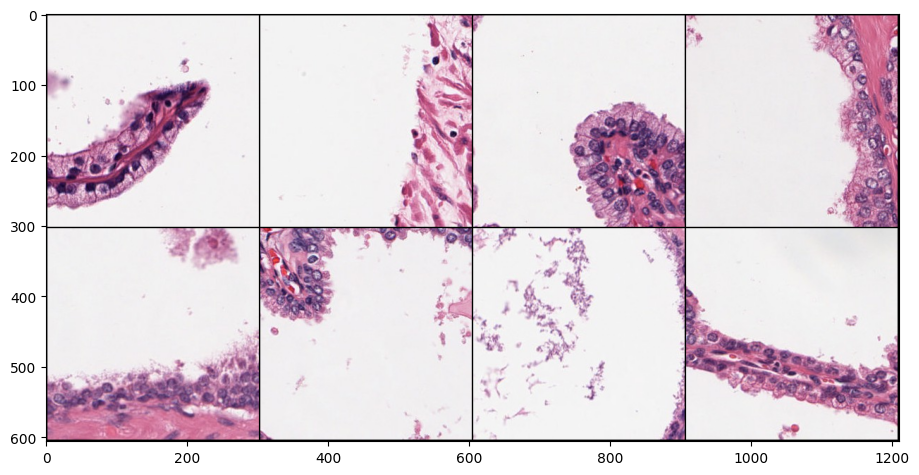

In [130]:
#Show raw images before the processing:
show_images(dataset_raw, 8, False)

Diplaying  8  random images:

The size of each image:
torch.Size([3, 224, 224])

The lowest pixel value in the image tensor:  tensor(0.0044)

The highest pixel value in the image tensor:  tensor(1.)

labels:  tensor([0, 0, 0, 0, 0, 0, 0, 0])
Legend:
0 -> gland
1 -> nongland
2 -> tumor


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


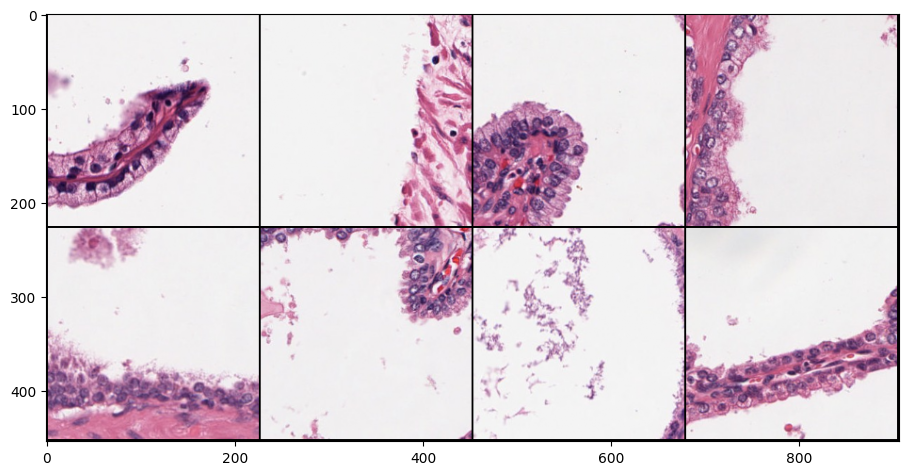

In [131]:
#Show modified images after the processing:
show_images(dataset_mod, 8, False)

**Important Note:**

For Dataset #2, the images are already normalized between [0,1] Hence, further normalization is not needed since all the tensor values representing the images have a value between 0 and 1 as shown above